In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, GRU, Dense
from tensorflow.keras.models import Sequential
import os







In [7]:
# Define the path to your dataset folder (the parent folder containing class folders)
dataset_dir = 'G:\Data\TB\TB_Chest_Radiography_Database'  # Replace with the path to your dataset directory

# Create a list of class names based on the subdirectories in the dataset directory
class_names = os.listdir(dataset_dir)

# Calculate the number of classes based on the class_names list
num_classes = len(class_names)

In [8]:
# Create a TensorFlow dataset from the directory
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    image_size=(28, 28),  # Adjust image size as needed
    batch_size=32,        # Adjust batch size as needed
    shuffle=True,
    seed=42
)

Found 4200 files belonging to 2 classes.


In [9]:
# Split the dataset into training and testing subsets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [10]:
# Build a model with a combination of CNN, LSTM, and GRU layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    tf.keras.layers.Reshape(target_shape=(1600, 1)),  # Reshape data to fit the LSTM layer
    LSTM(128, return_sequences=True),  # LSTM layer
    GRU(64, return_sequences=True),    # GRU layer
    LSTM(32),                          # Another LSTM layer
    Dense(num_classes, activation='softmax')
])


In [11]:
# Compile the model
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
105/105 [==============================] - 541s 5s/step - loss: 0.3313 - accuracy: 0.8807 - val_loss: 0.2620 - val_accuracy: 0.8893
Epoch 2/10
105/105 [==============================] - 527s 5s/step - loss: 0.2841 - accuracy: 0.9015 - val_loss: 0.2474 - val_accuracy: 0.9095
Epoch 3/10
105/105 [==============================] - 505s 5s/step - loss: 0.3786 - accuracy: 0.8661 - val_loss: 0.4028 - val_accuracy: 0.8405
Epoch 4/10
105/105 [==============================] - 510s 5s/step - loss: 0.3567 - accuracy: 0.8682 - val_loss: 0.2735 - val_accuracy: 0.8857
Epoch 5/10
105/105 [==============================] - 551s 5s/step - loss: 0.2805 - accuracy: 0.9012 - val_loss: 0.2170 - val_accuracy: 0.9250
Epoch 6/10
105/105 [==============================] - 533s 5s/step - loss: 0.2729 - accuracy: 0.9036 - val_loss: 0.2195 - val_accuracy: 0.9155
Epoch 7/10
105/105 [==============================] - 516s 5s/step - loss: 0.2410 - accuracy: 0.9060 - val_loss: 0.2272 - val_accuracy: 0.9036

Epoch 1/10
105/105 [==============================] - 523s 5s/step - loss: 0.2399 - accuracy: 0.9098 - val_loss: 0.3245 - val_accuracy: 0.9071
Epoch 2/10
105/105 [==============================] - 525s 5s/step - loss: 0.2331 - accuracy: 0.9107 - val_loss: 0.2300 - val_accuracy: 0.9083
Epoch 3/10
105/105 [==============================] - 519s 5s/step - loss: 0.2089 - accuracy: 0.9143 - val_loss: 0.1820 - val_accuracy: 0.9202
Epoch 4/10
105/105 [==============================] - 557s 5s/step - loss: 0.2197 - accuracy: 0.9146 - val_loss: 0.2445 - val_accuracy: 0.9131
Epoch 5/10
105/105 [==============================] - 521s 5s/step - loss: 0.2117 - accuracy: 0.9158 - val_loss: 0.1956 - val_accuracy: 0.9119
Epoch 6/10
105/105 [==============================] - 513s 5s/step - loss: 0.2105 - accuracy: 0.9158 - val_loss: 0.2059 - val_accuracy: 0.9155
Epoch 7/10
105/105 [==============================] - 512s 5s/step - loss: 0.2125 - accuracy: 0.9107 - val_loss: 0.2095 - val_accuracy: 0.9179

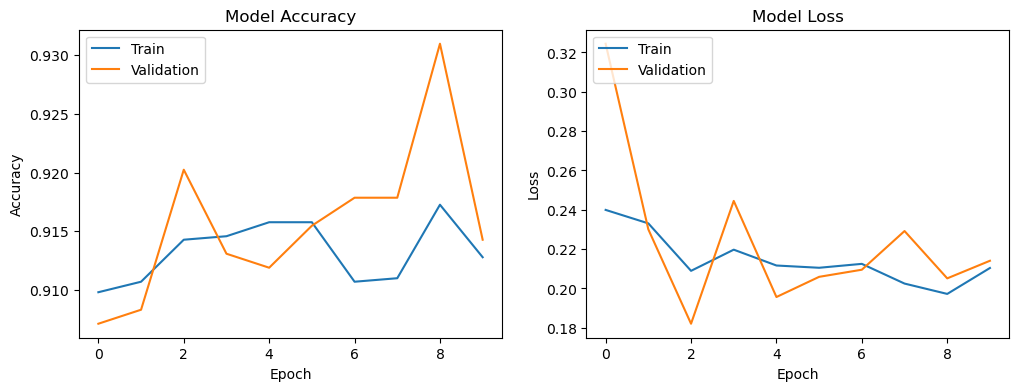

In [13]:
import matplotlib.pyplot as plt

# Access the training history
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [15]:
# Save the model to a file
model.save('my_model12.h5')


In [16]:
from tensorflow.keras.models import load_model

# Load a saved model
loaded_model = load_model('my_model.h5')


In [17]:
# Make predictions on a batch of data
predictions = model.predict(test_dataset)


27/27 [==============================] - 48s 1s/step


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert the test dataset to NumPy arrays for evaluation
y_true = []
y_pred = []

for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# Compute a classification report
target_names = class_names  # List of class names
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

# Compute a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)


1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

      Normal       0.91      1.00      0.95       712
Tuberculosis       0.98      0.48      0.64       128

    accuracy                           0.92       840
   macro avg       0.95      0.74      0.80       840
weighted avg       0.92      0.92      0.91       840

[[711   1]
 [ 67  61]]
